In [128]:
from pytorch_wavelets import DWTForward, DWTInverse
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import numpy as np
import cv2

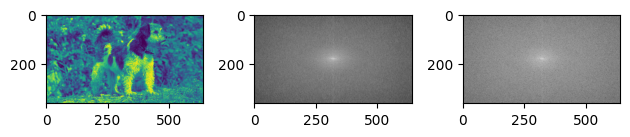

In [129]:
# Load test image
img = cv2.imread("data/test.jpg")
img = img.astype(np.float32)
img = img / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Normal image
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img)

# FFT of the image
transform = transforms.Compose([
    transforms.ToTensor()
])
img_tensor = transform(img)
fft_image = torch.fft.fftshift(torch.fft.fft2(img_tensor)).real.permute(1, 2, 0).cpu().numpy()
ax[1].imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(img)))), cmap='gray')
ax[2].imshow(np.log(abs(fft_image)), cmap='gray')

plt.tight_layout()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.49362335..0.49013174].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0831307..0.8670677].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9611387..2.4176311].


torch.Size([1, 1, 360, 640])
torch.Size([1, 1, 3, 180, 320])


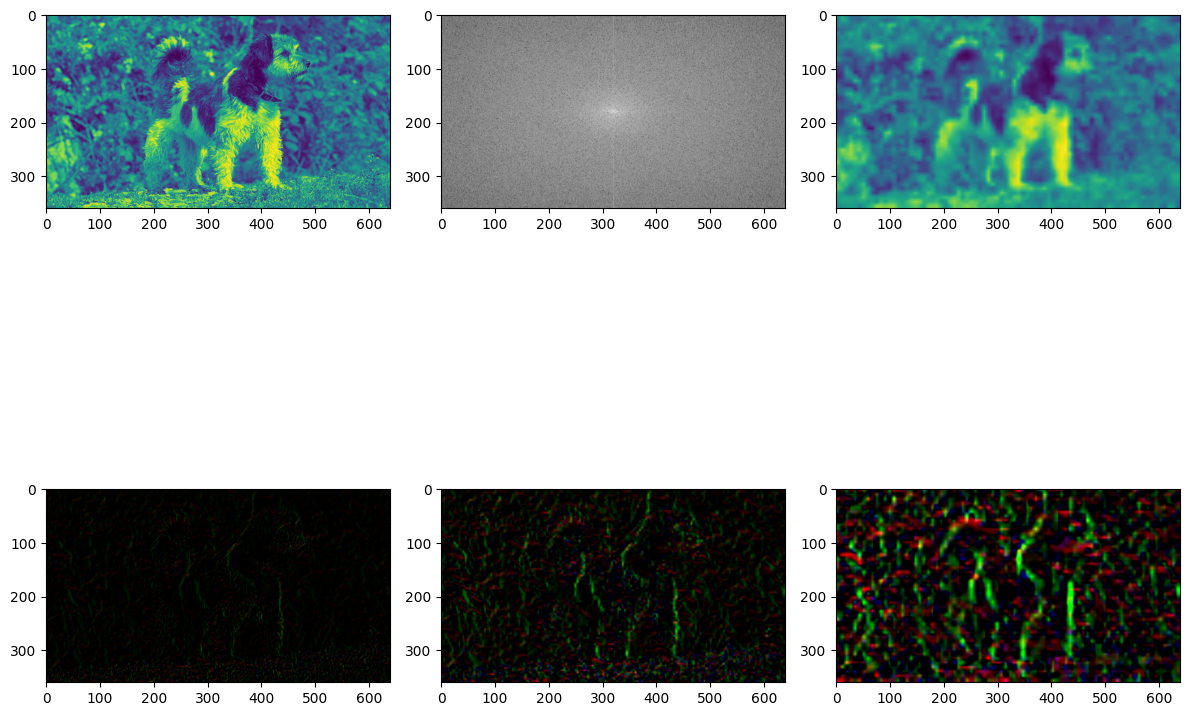

In [159]:
# Load test image
from pywt import dwt
img = cv2.imread("data/test.jpg")
img = img.astype(np.float32)
img = img / 255.0
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
height, width = img.shape[0], img.shape[1]

# Normal image
fig, ax = plt.subplots(2, 3, figsize=(12, 12))
ax[0][0].imshow(img)

# FFT of the image
transform = transforms.Compose([
    transforms.ToTensor()
])
img_tensor = transform(img)
fft_image = torch.fft.fftshift(torch.fft.fft2(img_tensor)).real.permute(1, 2, 0).cpu().numpy()
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.shape)
Approx, [H, V, D] = DWTForward(J=3, wave="haar", mode="zero")(img_tensor)
print(H.shape)
ax[0][1].imshow(np.log(abs(fft_image)), cmap='gray')
Approx = Approx.permute(0, 2, 3, 1).cpu().numpy()
Approx = Approx.squeeze()
Approx = cv2.resize(Approx, (width, height)) 
H = cv2.resize(H.permute(0, 1, 3, 4, 2).cpu().numpy().squeeze().squeeze(), (width, height)) 
V = cv2.resize(V.permute(0, 1, 3, 4, 2).cpu().numpy().squeeze().squeeze(), (width, height)) 
D = cv2.resize(D.permute(0, 1, 3, 4, 2).cpu().numpy().squeeze().squeeze(), (width, height)) 
ax[0][2].imshow(Approx)
ax[1][0].imshow(H)
ax[1][1].imshow(V)
ax[1][2].imshow(D)
plt.tight_layout()